# Empresa: RetailNova S.A. 
## Rol: Data Analyst Jr / Data Analyst Semi-Jr 
## Equipo: Analytics & BI 
## Objetivo del ejercicio: 
## Evaluar tu capacidad para: 
### Entender datos sucios 
### Tomar decisiones razonables 
### Limpiar, transformar y analizar información con pandas 
### Justificar tus elecciones

## Parte 1

In [3]:
# Importar librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Leer el archivo de excel y pasarlo a una variable
df_ventas = pd.read_excel(r"C:\Users\ASUS\Desktop\retailnova-entrevista-analisis\data\raw\ventas_sucias_entrevista.xlsx")
df_ventas.head(10)

,id_venta,fecha,cliente,producto,categoria,cantidad,precio_unitario,canal,vendedor,descuento
0,1,2024-01-05,Juan Perez,Laptop,Electronica,2.0,1200.0,Online,Ana,0.10
1,2,2024/01/05,Maria Lopez,mouse,Accesorios,NaN,25.0,Tienda,NaN,NaN
2,3,NaN,Carlos Ruiz,Teclado,NaN,1.0,45.0,Online,Pedro,0.00
3,4,2024-01-06,Laura Gomez,Monitor,Electronica,1.0,300.0,Online,Ana,NaN
4,4,2024-01-06,Laura Gomez,Monitor,Electronica,1.0,300.0,Online,Ana,NaN
5,5,2024-01-07,Andres Mora,Silla,Muebles,NaN,150.0,Tienda,Luis,0.05
6,6,07-01-2024,Paula Diaz,Escritorio,Muebles,2.0,NaN,Online,Luis,NaN
7,7,2024-01-08,Sofia Vega,laptop,Electrónica,1.0,1250.0,Online,NaN,0.15
8,8,2024-01-08,Juan Perez,Mouse,Accesorios,3.0,20.0,Tienda,Pedro,0.00
9,9,NaN,Cliente sin nombre,Webcam,Electronica,1.0,80.0,NaN,Ana,NaN


In [5]:
# Exploración de datos con .info()
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_venta         10 non-null     int64  
 1   fecha            8 non-null      object 
 2   cliente          10 non-null     object 
 3   producto         10 non-null     object 
 4   categoria        9 non-null      object 
 5   cantidad         8 non-null      float64
 6   precio_unitario  9 non-null      float64
 7   canal            9 non-null      object 
 8   vendedor         8 non-null      object 
 9   descuento        5 non-null      float64
dtypes: float64(3), int64(1), object(6)
memory usage: 932.0+ bytes


In [6]:
# Exploración de datos con .describe()
df_ventas.describe()

,id_venta,cantidad,precio_unitario,descuento
count,10.000000,8.000000,9.000000,5.000000
mean,4.900000,1.500000,374.444444,0.060000
std,2.601282,0.755929,494.035958,0.065192
min,1.000000,1.000000,20.000000,0.000000
25%,3.250000,1.000000,45.000000,0.000000
50%,4.500000,1.000000,150.000000,0.050000
75%,6.750000,2.000000,300.000000,0.100000
max,9.000000,3.000000,1250.000000,0.150000


In [7]:
# Verificar si hay valores nulos
df_ventas.isna().sum()

id_venta           0
fecha              2
cliente            0
producto           0
categoria          1
cantidad           2
precio_unitario    1
canal              1
vendedor           2
descuento          5
dtype: int64

In [8]:
# verificar si hay valores duplicados
df_ventas.duplicated().sum()

1

## Parte 2

In [10]:
df_ventas

,id_venta,fecha,cliente,producto,categoria,cantidad,precio_unitario,canal,vendedor,descuento
0,1,2024-01-05,Juan Perez,Laptop,Electronica,2.0,1200.0,Online,Ana,0.10
1,2,2024/01/05,Maria Lopez,mouse,Accesorios,NaN,25.0,Tienda,NaN,NaN
2,3,NaN,Carlos Ruiz,Teclado,NaN,1.0,45.0,Online,Pedro,0.00
3,4,2024-01-06,Laura Gomez,Monitor,Electronica,1.0,300.0,Online,Ana,NaN
4,4,2024-01-06,Laura Gomez,Monitor,Electronica,1.0,300.0,Online,Ana,NaN
5,5,2024-01-07,Andres Mora,Silla,Muebles,NaN,150.0,Tienda,Luis,0.05
6,6,07-01-2024,Paula Diaz,Escritorio,Muebles,2.0,NaN,Online,Luis,NaN
7,7,2024-01-08,Sofia Vega,laptop,Electrónica,1.0,1250.0,Online,NaN,0.15
8,8,2024-01-08,Juan Perez,Mouse,Accesorios,3.0,20.0,Tienda,Pedro,0.00
9,9,NaN,Cliente sin nombre,Webcam,Electronica,1.0,80.0,NaN,Ana,NaN


In [11]:
# Normalizar datos
df_ventas["producto"] = df_ventas["producto"].replace("mouse","Mouse")
df_ventas["categoria"] = df_ventas["categoria"].replace("Electronica","Electrónica")
df_ventas

,id_venta,fecha,cliente,producto,categoria,cantidad,precio_unitario,canal,vendedor,descuento
0,1,2024-01-05,Juan Perez,Laptop,Electrónica,2.0,1200.0,Online,Ana,0.10
1,2,2024/01/05,Maria Lopez,Mouse,Accesorios,NaN,25.0,Tienda,NaN,NaN
2,3,NaN,Carlos Ruiz,Teclado,NaN,1.0,45.0,Online,Pedro,0.00
3,4,2024-01-06,Laura Gomez,Monitor,Electrónica,1.0,300.0,Online,Ana,NaN
4,4,2024-01-06,Laura Gomez,Monitor,Electrónica,1.0,300.0,Online,Ana,NaN
5,5,2024-01-07,Andres Mora,Silla,Muebles,NaN,150.0,Tienda,Luis,0.05
6,6,07-01-2024,Paula Diaz,Escritorio,Muebles,2.0,NaN,Online,Luis,NaN
7,7,2024-01-08,Sofia Vega,laptop,Electrónica,1.0,1250.0,Online,NaN,0.15
8,8,2024-01-08,Juan Perez,Mouse,Accesorios,3.0,20.0,Tienda,Pedro,0.00
9,9,NaN,Cliente sin nombre,Webcam,Electrónica,1.0,80.0,NaN,Ana,NaN


In [12]:
# Normalizar fecha y cambiar el tipo de dato
df_ventas["fecha"] = pd.to_datetime(
    df_ventas["fecha"],
    errors="coerce",
    dayfirst=True
)

In [13]:
# Rellenar valores nulls en fechas
df_ventas["fecha"] = df_ventas["fecha"].fillna(method="ffill")

In [14]:
# Función para agregar Desconocido a columnas con NaN
def rellenar_desconocido (columnas):
    for columna in columnas:
        df_ventas[columna] = df_ventas[columna].fillna("Desconocido")
    
# Rellenar y reemplazar valores NaN
df_ventas["cantidad"] = df_ventas["cantidad"].fillna(1).astype(int)
df_ventas["precio_unitario"] = df_ventas["precio_unitario"].fillna(df_ventas.groupby("categoria")["precio_unitario"].transform("mean"))
df_ventas["descuento"] = df_ventas["descuento"].fillna(df_ventas.groupby("categoria")["descuento"].transform("mean"))
df_ventas["cliente"] = df_ventas["cliente"].replace("Cliente sin nombre","Desconocido")
df_ventas["categoria"] = df_ventas["categoria"].fillna(df_ventas["categoria"].mode()[0])

# Llamar la función ingresando como parametros los nombres de las columnas que queremos hacer el reemplazo
rellenar_desconocido(["canal","vendedor"])
df_ventas

,id_venta,fecha,cliente,producto,categoria,cantidad,precio_unitario,canal,vendedor,descuento
0,1,2024-05-01,Juan Perez,Laptop,Electrónica,2,1200.0,Online,Ana,0.100
1,2,2024-05-01,Maria Lopez,Mouse,Accesorios,1,25.0,Tienda,Desconocido,0.000
2,3,2024-05-01,Carlos Ruiz,Teclado,Electrónica,1,45.0,Online,Pedro,0.000
3,4,2024-06-01,Laura Gomez,Monitor,Electrónica,1,300.0,Online,Ana,0.125
4,4,2024-06-01,Laura Gomez,Monitor,Electrónica,1,300.0,Online,Ana,0.125
5,5,2024-07-01,Andres Mora,Silla,Muebles,1,150.0,Tienda,Luis,0.050
6,6,2024-07-01,Paula Diaz,Escritorio,Muebles,2,150.0,Online,Luis,0.050
7,7,2024-08-01,Sofia Vega,laptop,Electrónica,1,1250.0,Online,Desconocido,0.150
8,8,2024-08-01,Juan Perez,Mouse,Accesorios,3,20.0,Tienda,Pedro,0.000
9,9,2024-08-01,Desconocido,Webcam,Electrónica,1,80.0,Desconocido,Ana,0.125


In [15]:
# Eliminar duplucados
df_ventas = df_ventas.drop_duplicates()
df_ventas

,id_venta,fecha,cliente,producto,categoria,cantidad,precio_unitario,canal,vendedor,descuento
0,1,2024-05-01,Juan Perez,Laptop,Electrónica,2,1200.0,Online,Ana,0.100
1,2,2024-05-01,Maria Lopez,Mouse,Accesorios,1,25.0,Tienda,Desconocido,0.000
2,3,2024-05-01,Carlos Ruiz,Teclado,Electrónica,1,45.0,Online,Pedro,0.000
3,4,2024-06-01,Laura Gomez,Monitor,Electrónica,1,300.0,Online,Ana,0.125
5,5,2024-07-01,Andres Mora,Silla,Muebles,1,150.0,Tienda,Luis,0.050
6,6,2024-07-01,Paula Diaz,Escritorio,Muebles,2,150.0,Online,Luis,0.050
7,7,2024-08-01,Sofia Vega,laptop,Electrónica,1,1250.0,Online,Desconocido,0.150
8,8,2024-08-01,Juan Perez,Mouse,Accesorios,3,20.0,Tienda,Pedro,0.000
9,9,2024-08-01,Desconocido,Webcam,Electrónica,1,80.0,Desconocido,Ana,0.125


In [16]:
# Verificar nuevamente los tipos de datos y si aun hay valores nulos
df_ventas.info()
df_ventas.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 0 to 9
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id_venta         9 non-null      int64         
 1   fecha            9 non-null      datetime64[ns]
 2   cliente          9 non-null      object        
 3   producto         9 non-null      object        
 4   categoria        9 non-null      object        
 5   cantidad         9 non-null      int32         
 6   precio_unitario  9 non-null      float64       
 7   canal            9 non-null      object        
 8   vendedor         9 non-null      object        
 9   descuento        9 non-null      float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(5)
memory usage: 756.0+ bytes


id_venta           0
fecha              0
cliente            0
producto           0
categoria          0
cantidad           0
precio_unitario    0
canal              0
vendedor           0
descuento          0
dtype: int64

## Parte 3

In [18]:
df_ventas

,id_venta,fecha,cliente,producto,categoria,cantidad,precio_unitario,canal,vendedor,descuento
0,1,2024-05-01,Juan Perez,Laptop,Electrónica,2,1200.0,Online,Ana,0.100
1,2,2024-05-01,Maria Lopez,Mouse,Accesorios,1,25.0,Tienda,Desconocido,0.000
2,3,2024-05-01,Carlos Ruiz,Teclado,Electrónica,1,45.0,Online,Pedro,0.000
3,4,2024-06-01,Laura Gomez,Monitor,Electrónica,1,300.0,Online,Ana,0.125
5,5,2024-07-01,Andres Mora,Silla,Muebles,1,150.0,Tienda,Luis,0.050
6,6,2024-07-01,Paula Diaz,Escritorio,Muebles,2,150.0,Online,Luis,0.050
7,7,2024-08-01,Sofia Vega,laptop,Electrónica,1,1250.0,Online,Desconocido,0.150
8,8,2024-08-01,Juan Perez,Mouse,Accesorios,3,20.0,Tienda,Pedro,0.000
9,9,2024-08-01,Desconocido,Webcam,Electrónica,1,80.0,Desconocido,Ana,0.125


In [19]:
#Ventas totales
df_ventas["venta_total"] = df_ventas["cantidad"] * df_ventas["precio_unitario"]
df_ventas["valor_descuento"] = df_ventas["venta_total"] * df_ventas["descuento"]
df_ventas["venta_neta"] = df_ventas["venta_total"] - df_ventas["valor_descuento"]
df_ventas

,id_venta,fecha,cliente,producto,categoria,cantidad,precio_unitario,canal,vendedor,descuento,venta_total,valor_descuento,venta_neta
0,1,2024-05-01,Juan Perez,Laptop,Electrónica,2,1200.0,Online,Ana,0.100,2400.0,240.0,2160.0
1,2,2024-05-01,Maria Lopez,Mouse,Accesorios,1,25.0,Tienda,Desconocido,0.000,25.0,0.0,25.0
2,3,2024-05-01,Carlos Ruiz,Teclado,Electrónica,1,45.0,Online,Pedro,0.000,45.0,0.0,45.0
3,4,2024-06-01,Laura Gomez,Monitor,Electrónica,1,300.0,Online,Ana,0.125,300.0,37.5,262.5
5,5,2024-07-01,Andres Mora,Silla,Muebles,1,150.0,Tienda,Luis,0.050,150.0,7.5,142.5
6,6,2024-07-01,Paula Diaz,Escritorio,Muebles,2,150.0,Online,Luis,0.050,300.0,15.0,285.0
7,7,2024-08-01,Sofia Vega,laptop,Electrónica,1,1250.0,Online,Desconocido,0.150,1250.0,187.5,1062.5
8,8,2024-08-01,Juan Perez,Mouse,Accesorios,3,20.0,Tienda,Pedro,0.000,60.0,0.0,60.0
9,9,2024-08-01,Desconocido,Webcam,Electrónica,1,80.0,Desconocido,Ana,0.125,80.0,10.0,70.0


In [20]:
# Exportar tabla limpia
df_ventas.to_csv(r'C:\Users\ASUS\Desktop\retailnova-entrevista-analisis\data\processed\ventas_limpias.csv', index=False)

In [21]:
# Ventas por categorias
ventas_por_categoria = df_ventas.groupby("categoria")["venta_total"].sum()
ventas_por_categoria.sort_values(ascending=False)

categoria
Electrónica    4075.0
Muebles         450.0
Accesorios       85.0
Name: venta_total, dtype: float64

In [22]:
# % Ventas por categorias
porc_ventas_por_categoria = round((ventas_por_categoria / df_ventas["venta_total"].sum()) * 100, 2)
porc_ventas_por_categoria.sort_values(ascending=False)

categoria
Electrónica    88.39
Muebles         9.76
Accesorios      1.84
Name: venta_total, dtype: float64

In [23]:
# compras por clientes
compras_por_clientes = df_ventas.groupby("cliente")["venta_total"].sum()
compras_por_clientes.sort_values(ascending=False)

cliente
Juan Perez     2460.0
Sofia Vega     1250.0
Laura Gomez     300.0
Paula Diaz      300.0
Andres Mora     150.0
Desconocido      80.0
Carlos Ruiz      45.0
Maria Lopez      25.0
Name: venta_total, dtype: float64

In [24]:
# % compras por clientes
porc_compras_por_clientes = round((compras_por_clientes /df_ventas["venta_total"].sum()) * 100, 2)
porc_compras_por_clientes.sort_values(ascending=False)

cliente
Juan Perez     53.36
Sofia Vega     27.11
Laura Gomez     6.51
Paula Diaz      6.51
Andres Mora     3.25
Desconocido     1.74
Carlos Ruiz     0.98
Maria Lopez     0.54
Name: venta_total, dtype: float64

In [25]:
# Ventas por vendedor
ventas_por_vendedor = df_ventas.groupby("vendedor")["venta_total"].sum()
ventas_por_vendedor.sort_values(ascending=False)

vendedor
Ana            2780.0
Desconocido    1275.0
Luis            450.0
Pedro           105.0
Name: venta_total, dtype: float64

In [26]:
# % Ventas por vendedor
porc_ventas_por_vendedor = round((ventas_por_vendedor /df_ventas["venta_total"].sum()) * 100, 2)
porc_ventas_por_vendedor.sort_values(ascending=False)

vendedor
Ana            60.30
Desconocido    27.66
Luis            9.76
Pedro           2.28
Name: venta_total, dtype: float64

In [27]:
# Ventas por canal
ventas_por_canal = df_ventas.groupby("canal")["venta_total"].sum()
ventas_por_canal.sort_values(ascending=False)

canal
Online         4295.0
Tienda          235.0
Desconocido      80.0
Name: venta_total, dtype: float64

In [28]:
# % Ventas por canal
porc_ventas_por_canal = round((ventas_por_canal / df_ventas["venta_total"].sum()) * 100, 2)
porc_ventas_por_canal.sort_values(ascending=False)

canal
Online         93.17
Tienda          5.10
Desconocido     1.74
Name: venta_total, dtype: float64

In [29]:
# Producto top en ventas
producto_top_ventas = df_ventas.groupby("producto")["venta_total"].sum()
print(f"El producto top en ventas es: {producto_top_ventas.idxmax()} con unos ingresos de: {producto_top_ventas.max()}")

El producto top en ventas es: Laptop con unos ingresos de: 2400.0


In [30]:
# Producto top unidades
producto_top_unidades = df_ventas.groupby("producto")["cantidad"].sum()
print(f"El producto top en unidades vendidas es: {producto_top_unidades.idxmax()} con un total de: {producto_top_unidades.max()} unidades vendidas")

El producto top en unidades vendidas es: Mouse con un total de: 4 unidades vendidas


In [31]:
# Impacto del descuento

def totales (columnas):
    for columna in columnas:
        globals()[f"total_{columna}"] = df_ventas[columna].sum()

totales (["valor_descuento", "venta_neta", "venta_total"])

In [32]:
# Porcentaje global de los descuentos
descuento_global = (total_valor_descuento / total_venta_total) * 100
descuento_global

10.79175704989154

In [33]:
# Impacto descuentos por producto
def totales_por_producto (columnas):
    for columna in columnas:
        globals()[f"total_{columna}"] = df_ventas.groupby("producto")[columna].sum()
        

totales_por_producto (["valor_descuento", "venta_neta", "venta_total"])

In [34]:
descuento_por_producto = (total_valor_descuento / total_venta_total) * 100
descuento_por_producto.sort_values(ascending=False)

producto
laptop        15.0
Monitor       12.5
Webcam        12.5
Laptop        10.0
Escritorio     5.0
Silla          5.0
Mouse          0.0
Teclado        0.0
dtype: float64

## Graficos 

In [36]:
# Función para creación de graficos
def graficar (datos,titulo,xlabel,ylabel,color='blue',edge='black',rotacion=45,line='--',alpha=0.7):
    plt.figure(figsize=(10,6)) # se configura el largo y ancho de la grafica
    datos.plot(kind='bar', color= color, edgecolor= edge) # Se configura tipo de grafico y diseño
    plt.title(titulo) # Título que llevara el garfico
    plt.xlabel(xlabel) # Etiquete del grafico eje x
    plt.ylabel(ylabel) # Etiquete del grafico eje y
    plt.xticks(rotation=rotacion) # se rota para que sea mas visible
    plt.grid(axis='y', linestyle=line, alpha=alpha) # Estilos del grafico
    plt.savefig(rf'C:\Users\ASUS\Desktop\retailnova-entrevista-analisis\outputs\Graficos\{titulo}.png', dpi=300, bbox_inches='tight') # Guardar grafico
    plt.show() # Mostrar el gráfico

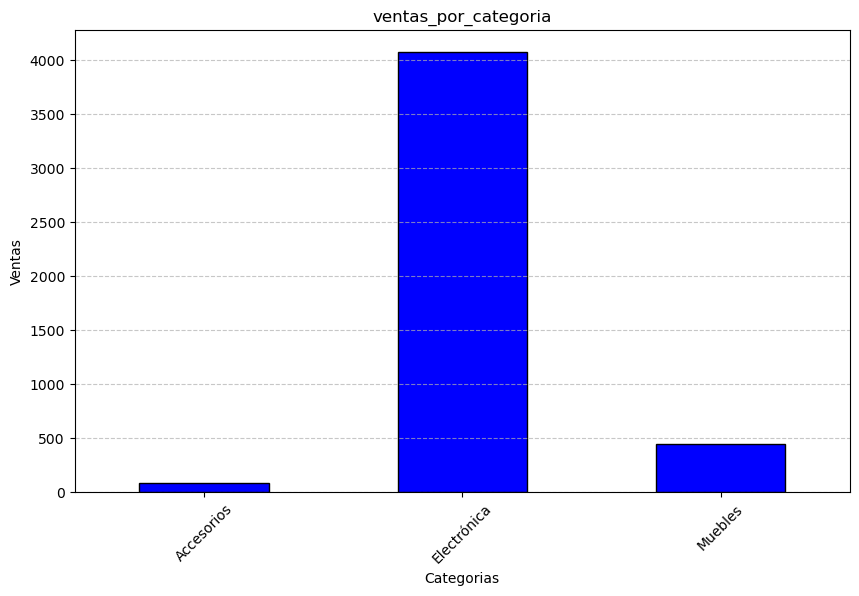

In [37]:
# Grafico ventas_por_categoria

graficar(ventas_por_categoria,'ventas_por_categoria','Categorias', 'Ventas')

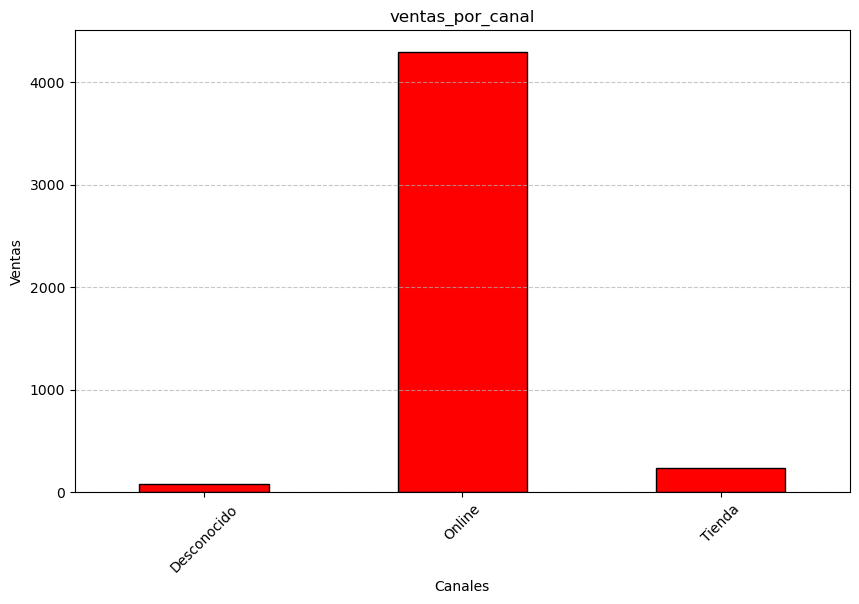

In [38]:
# Grafico ventas_por_canal

graficar(ventas_por_canal,'ventas_por_canal','Canales', 'Ventas',color='red')

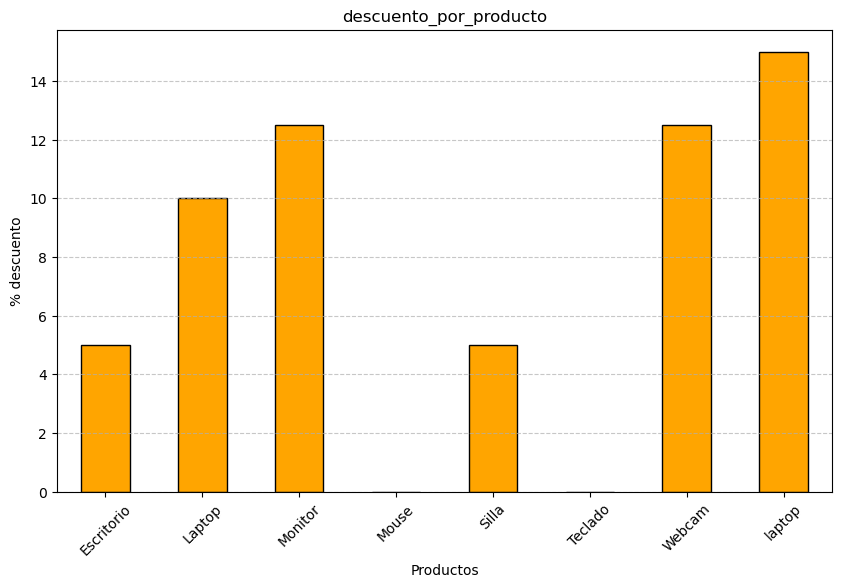

In [39]:
# Grafico descuento_por_producto

graficar (descuento_por_producto,'descuento_por_producto','Productos','% descuento', color='orange')

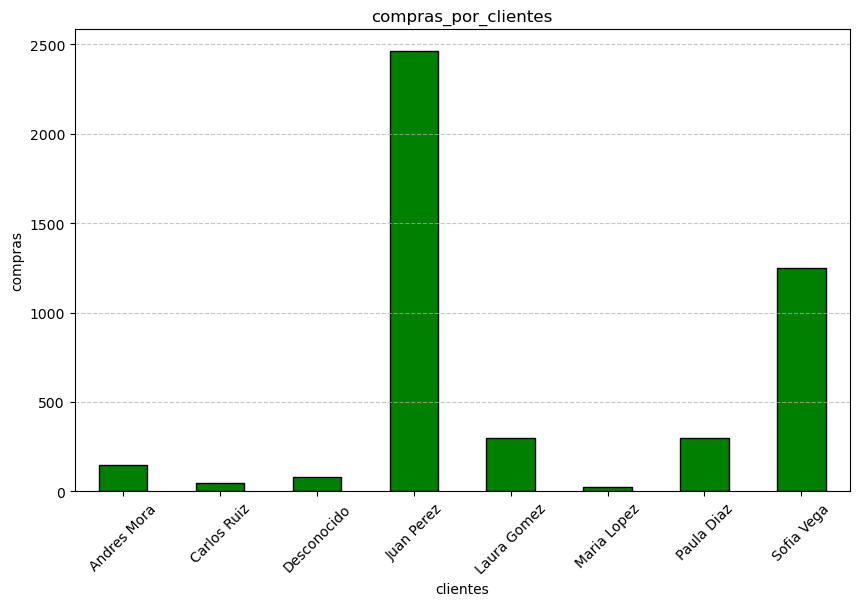

In [40]:
# Grafico vcompras_por_clientes

graficar(compras_por_clientes,'compras_por_clientes','clientes','compras',color='green')

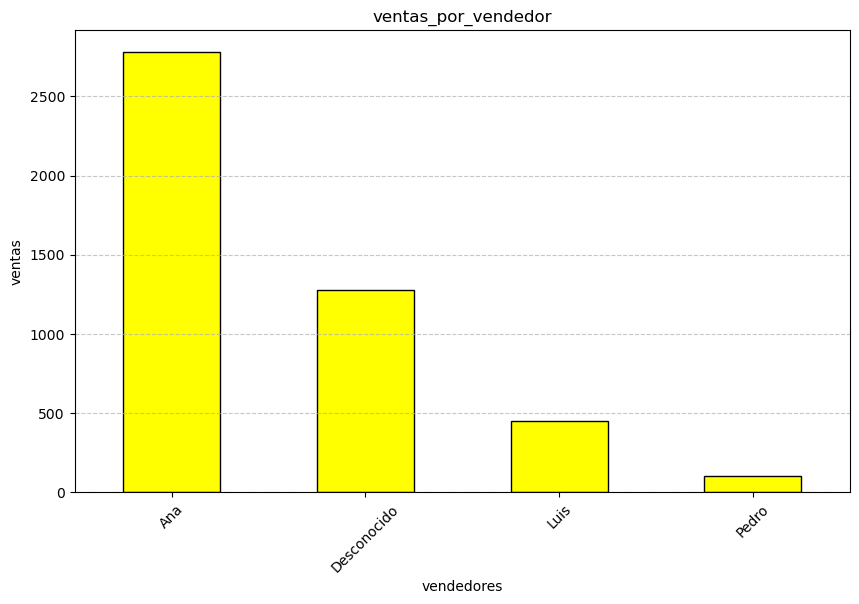

In [41]:
# Grafico ventas_por_vendedores

graficar(ventas_por_vendedor,'ventas_por_vendedor','vendedores','ventas',color='yellow')

# Insights

### 1. Se encontró una venta duplicado, coincidian todos los datos, posible falla del sistema a la hora de generar la venta o factura
### 2. La categoria mas vendido por la empresa en el segundo cuatrimestre fue la de Electronica con unos ingresos totales de 4.075 en ventas, es decir el 88.39% de las ventas totales
### 3. El cliente que mas compró durante el segundo cuatrimestre fue Juan Perez con una compra total de 2.460, es decir el 53.36%, adicional los clientes que menos compraron fueron Carlos Ruiz y Maria Lopez los cuales no llegaron ni al 1% del total de las ventas
### 4. La vendedora que mas ventas hizo durante el segundo cuatrimestre fue Ana con un total de 2.780 de ingresos, es decir un 60.30%, mientras que los  vendedores Luis y Pedro no superaron el 10% por cada uno, tener en cuanta que el 27.66% de las ventas no tiene un vendedor asignado
### 5. El producto con mas ingresos durante el segundo cuarimestre fue la laptop con un total de 2.400, mientras que el producto mas vendido fue el Mouse con un total de 4 unidades vendidas
### 6. Mas del 93% de las ventas del segundo cuatrimestre fue generado por el canal Online, mientras que por la tienda solo se vendió un poco mas del 5%, tener en cuenta que 1.74% de las venas no tenia asociado el canal por el cual fue vendido
### 7. El promedio de los descuento que se dieron a los clientes durante el segundo cuatrimestre fue de un 10%, adicional, a productos como mouses y teclados no se les otorgó descuentos, mientras que a otros productos como laptos, monitores y webcams tuvieron descuentos superiores a la media (+12% descuento)